### 1. What is the fundamental idea behind Support Vector Machines
The idea is to put largest possible margin between classes

### 2. What is support vector?
Support vector is a data point which lays on the margin by which it is actually describing support vector machine decision boundary

### 3. Why is it important to scale the inputs when using SVMs?
SVMs try to fit the largest possible "street" between the classes, so if the training set is not scaled, the SVM will tend to neglect small features

### 4. Can an SVM classifier output a confidence score when it classifies and instance? What about probability?
No

### 5. Should you use the primal or dual form of the SVM problem to train a model on a training set wityh millions of instances and hundreds of features?
Primal

### 6. Say you've trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease $\gamma$? What about C?
We should increase both

### 7. How should you set the QP parameters (H, f, A, and b) to solve the soft margin linear SVM classifier problem using of the shelf QP solver?

Minimize &emsp; $\frac{1}{2}p^THp + f^Tp$

subject to &emsp; $Ap \le b$

where

- p is an $n_p$-dimensional vector ($n_p$ = number of parameters)
- H is an $n_p \times n_p$ matrix
- f is an $n_p$-dimensional vector
- A is an $n_c \times n_p$ matrix ($n_c$ = number of constraints)
- b is an $n_p$-dimensional vector

To solve soft margin linear SVM we should set parameters to:
- $n_p = n + 1 + m$ where n is the number of features (the +1 for the bias term) and m is the number of data points
- $nc = m$, where m is the number of training instances
- H is the $n_p \times n_p$ identity matrix except with a zero in the top-left cell (to ignore the bias term)
- f = C, an $n_p$-dimensional vector full of C
- $b = \zeta - 1$, an $n_c$ dimensional vector full of $\zeta-1$
- $a^{(i)}=-t^{(i)}x^{(i)}$, where $x^{(i)}$ is equal to $x^{(i)}$ with an extra bias featuire $x_0=1$.

### 8. Train a LinearSVC on a linearly sepparable dataset. Then train SVC and SGDClassifier on the same dataset. See if you ccan get them to produce roughly the same model.

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

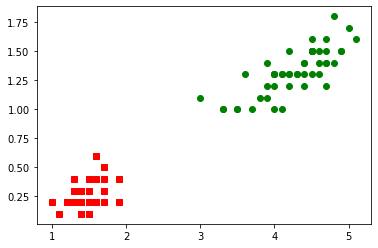

In [2]:
import matplotlib.pyplot as plt

plt.plot(X[y == 0][:, 0], X[y == 0][:, 1], "rs")
plt.plot(X[y == 1][:, 0], X[y == 1][:, 1], "go")

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

lin_clf = LinearSVC(C=1, loss="hinge")
svm_clf = SVC(kernel="linear", C=1)
sgd_clf = SGDClassifier(loss="hinge", alpha=1/(len(y)))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("Linear SVC", lin_clf.intercept_, lin_clf.coef_)
print("SVC", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier", sgd_clf.intercept_, svm_clf.coef_)

Linear SVC [0.29588877] [[1.0607458  1.00177835]]
SVC [0.32182521] [[1.04342638 0.94747825]]
SGDClassifier [0.36107581] [[1.04342638 0.94747825]]


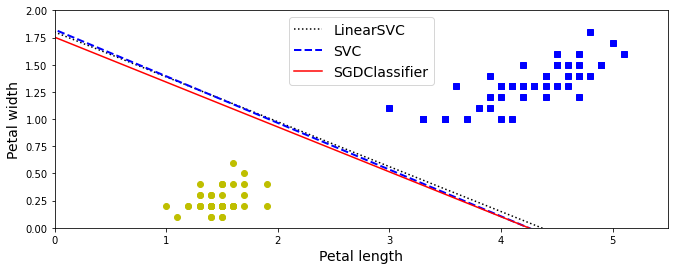

In [4]:
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w1 + b3], [10, 10 * w1 + b3]])

plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

### 9. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use on-versus-rest to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed upp the process. What accuracy can you reach?

In [5]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [6]:
import sklearn

sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C': [0.01, 0.03, 0.1]}
]

linear_svc = LinearSVC(loss="hinge")
grid_search = GridSearchCV(linear_svc, param_grid, cv=3, scoring="accuracy", return_train_score=True, n_jobs=10, verbose=2)

grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   9 | elapsed:  1.0min remaining:   49.7s
[Parallel(n_jobs=10)]: Done   9 out of   9 | elapsed:  1.5min finished
/home/kamil/dev/projects/ml/handson-ml/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='hinge', max_iter=1000, multi_class='ovr',
                                 penalty='l2', random_state=None, tol=0.0001,
                                 verbose=0),
             iid='deprecated', n_jobs=10, param_grid=[{'C': [0.01, 0.03, 0.1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=2)

In [9]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9064333333333333 {'C': 0.01}
0.90925 {'C': 0.03}
0.9095666666666666 {'C': 0.1}


In [10]:
# from sklearn.metrics import accuracy_score
#
# y_test_predict = grid_search.best_estimator_.predict(X_test_scaled)
# accuracy_score(y_test, y_test_predict)

In [11]:
param_grid = [
    {'C': [0.1, 5, 10, 100], 'kernel': ['poly'], 'degree': [2, 3], 'coef0': [1, 10]},
    {'C': [0.1, 5, 10, 100], 'kernel': ['rbf']}
]

svc_clf = SVC()
grid_search_svc = GridSearchCV(svc_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True, n_jobs=10, verbose=2)

grid_search_svc.fit(X_train_scaled[:2000], y_train[:2000])

cvres = grid_search_svc.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    4.1s
[Parallel(n_jobs=10)]: Done  60 out of  60 | elapsed:   11.1s finished


Fitting 3 folds for each of 20 candidates, totalling 60 fits
0.857514185850018 {'C': 0.1, 'coef0': 1, 'degree': 2, 'kernel': 'poly'}
0.8815126971049011 {'C': 0.1, 'coef0': 1, 'degree': 3, 'kernel': 'poly'}
0.8940094517305911 {'C': 0.1, 'coef0': 10, 'degree': 2, 'kernel': 'poly'}
0.886007446727087 {'C': 0.1, 'coef0': 10, 'degree': 3, 'kernel': 'poly'}
0.8995104549827189 {'C': 5, 'coef0': 1, 'degree': 2, 'kernel': 'poly'}
0.9030102066084075 {'C': 5, 'coef0': 1, 'degree': 3, 'kernel': 'poly'}
0.8830059444752099 {'C': 5, 'coef0': 10, 'degree': 2, 'kernel': 'poly'}
0.886007446727087 {'C': 5, 'coef0': 10, 'degree': 3, 'kernel': 'poly'}
0.8995097046071558 {'C': 10, 'coef0': 1, 'degree': 2, 'kernel': 'poly'}
0.9030102066084075 {'C': 10, 'coef0': 1, 'degree': 3, 'kernel': 'poly'}
0.8830059444752099 {'C': 10, 'coef0': 10, 'degree': 2, 'kernel': 'poly'}
0.886007446727087 {'C': 10, 'coef0': 10, 'degree': 3, 'kernel': 'poly'}
0.8995097046071558 {'C': 100, 'coef0': 1, 'degree': 2, 'kernel': 'poly'}


In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = [
    {'C': uniform(0.001, 500), "coef0": uniform(0, 1000), 'gamma': uniform(0.001, 100) }
]

svc_clf = SVC(kernel="poly")
rnd_search_cv = RandomizedSearchCV(svc_clf, param_distributions, n_iter=300, cv=3, verbose=2, n_jobs=10)
rnd_search_cv.fit(X_train_scaled[:2000], y_train[:2000])

cvres = rnd_search_cv.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
0.8715034374704541 {'C': 241.45824564467998, 'coef0': 140.75231379916485, 'gamma': 81.0430446245771}
0.8835041938490216 {'C': 145.96704381328826, 'coef0': 538.5641499199183, 'gamma': 29.424961548807254}
0.9045072058565312 {'C': 370.11355445994354, 'coef0': 325.8325810720857, 'gamma': 4.380927040869591}
0.8710036873455165 {'C': 75.91971399092154, 'coef0': 90.88785701411162, 'gamma': 47.81922109928719}
0.87350393872133 {'C': 265.6673096263191, 'coef0': 258.80318765590124, 'gamma': 71.33667416569594}
0.8845044444744595 {'C': 233.67489921409725, 'coef0': 955.5321276148912, 'gamma': 43.68976700618834}
0.8875051963507735 {'C': 489.2751561971891, 'coef0': 385.59915747941096, 'gamma': 14.32629117411998}
0.8815029422225824 {'C': 14.430171382501825, 'coef0': 301.7981737106745, 'gamma': 25.088421131096368}
0.8745034389712051 {'C': 377.4940924549503, 'coef0': 301.7833279030999, 'gamma': 78.13793807813786}
0.9085082083582833 {'C': 135.6

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    5.2s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:   27.1s
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 900 out of 900 | elapsed:  2.8min finished


In [13]:
rnd_search_cv.best_estimator_

SVC(C=135.65588846455054, break_ties=False, cache_size=200, class_weight=None,
    coef0=980.1804448366958, decision_function_shape='ovr', degree=3,
    gamma=6.65217817646661, kernel='poly', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [14]:
rnd_search_cv.best_score_

0.9085082083582833

In [15]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=135.65588846455054, break_ties=False, cache_size=200, class_weight=None,
    coef0=980.1804448366958, decision_function_shape='ovr', degree=3,
    gamma=6.65217817646661, kernel='poly', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [16]:
from sklearn.metrics import accuracy_score

y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

1.0

In [17]:
y_test_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_test_pred)

0.9813

### 10. Train and SVM regressord on the California housing dataset.

In [18]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
X = california_housing['data']
y = california_housing['target']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.svm import LinearSVR

linear_svr = LinearSVR()
linear_svr.fit(X_train, y_train)

/home/kamil/dev/projects/ml/handson-ml/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [21]:
from sklearn.metrics import mean_squared_error

y_train_predict = linear_svr.predict(X_train)
mean_squared_error(y_train, y_train_predict)

3.804417600781336

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
linear_svr = LinearSVR()
linear_svr.fit(X_train_scaled, y_train)

/home/kamil/dev/projects/ml/handson-ml/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [26]:
y_train_predict = linear_svr.predict(X_train_scaled)
mean_squared_error(y_train, y_train_predict)

0.9574882273381681